In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Diamonds Test

In [23]:
diamonds_test = pd.read_csv('diamonds_test.csv')
diamonds_test.head()

,id,city,cut,color,clarity,carat,depth,table,x,y,z
0,0,0,4,2,2,0.79,62.7,60.0,5.82,5.89,3.67
1,1,10,2,6,4,1.20,61.0,57.0,6.81,6.89,4.18
2,2,3,3,4,2,1.57,62.2,61.0,7.38,7.32,4.57
3,3,3,4,2,2,0.90,63.8,54.0,6.09,6.13,3.90
4,4,0,4,2,4,0.50,62.9,58.0,5.05,5.09,3.19


In [24]:
diamonds_test.describe()

,id,city,cut,color,clarity,carat,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,5.783686,2.554394,2.579088,3.820171,0.798642,61.739095,57.490337,5.736454,5.739648,3.543474
std,3892.928525,3.813219,1.024375,1.700614,1.723314,0.469399,1.435310,2.237109,1.113671,1.128507,0.731005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,50.800000,51.000000,0.000000,0.000000,0.000000
25%,3371.000000,2.000000,2.000000,1.000000,2.000000,0.400000,61.000000,56.000000,4.730000,4.730000,2.920000
50%,6742.000000,6.000000,2.000000,3.000000,4.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000
75%,10113.000000,10.000000,3.000000,4.000000,5.000000,1.040000,62.500000,59.000000,6.530000,6.530000,4.040000
max,13484.000000,12.000000,4.000000,6.000000,7.000000,5.010000,79.000000,73.000000,10.740000,31.800000,31.800000


In [25]:
num_feats = diamonds_test.loc[:,'carat':]
num_feats.head()

,carat,depth,table,x,y,z
0,0.79,62.7,60.0,5.82,5.89,3.67
1,1.20,61.0,57.0,6.81,6.89,4.18
2,1.57,62.2,61.0,7.38,7.32,4.57
3,0.90,63.8,54.0,6.09,6.13,3.90
4,0.50,62.9,58.0,5.05,5.09,3.19


In [26]:
num_feats_corr = num_feats.corr()
num_feats_corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table,x,y,z
carat,1.000000,0.033385,0.176245,0.973283,0.951900,0.913598
depth,0.033385,1.000000,-0.303653,-0.022049,-0.024359,0.095831
table,0.176245,-0.303653,1.000000,0.193130,0.180943,0.138777
x,0.973283,-0.022049,0.193130,1.000000,0.977762,0.931211
y,0.951900,-0.024359,0.180943,0.977762,1.000000,0.916161
z,0.913598,0.095831,0.138777,0.931211,0.916161,1.000000


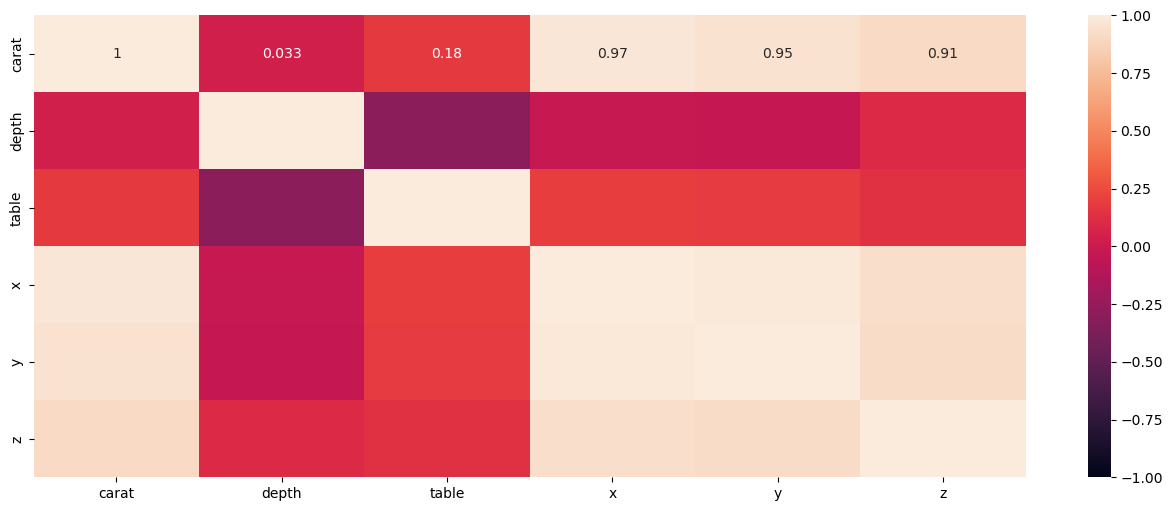

In [27]:
plt.figure(figsize=(16,6))
sns.heatmap(num_feats_corr, vmin=-1,vmax=1,annot=True)
plt.show()

In [28]:
num_feats_collin = num_feats.copy()
num_feats_collin.head()

,carat,depth,table,x,y,z
0,0.79,62.7,60.0,5.82,5.89,3.67
1,1.20,61.0,57.0,6.81,6.89,4.18
2,1.57,62.2,61.0,7.38,7.32,4.57
3,0.90,63.8,54.0,6.09,6.13,3.90
4,0.50,62.9,58.0,5.05,5.09,3.19


In [29]:
num_feats_collin= num_feats_collin.drop(columns='x')
num_feats_collin= num_feats_collin.drop(columns='y')
num_feats_collin= num_feats_collin.drop(columns='z')
num_feats_collin.head()

,carat,depth,table
0,0.79,62.7,60.0
1,1.20,61.0,57.0
2,1.57,62.2,61.0
3,0.90,63.8,54.0
4,0.50,62.9,58.0


In [30]:
num_feats_collin_corr = num_feats_collin.corr()
num_feats_collin_corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table
carat,1.000000,0.033385,0.176245
depth,0.033385,1.000000,-0.303653
table,0.176245,-0.303653,1.000000


Es posible que lo que influya en el precio de los diamantes sean el carat, depth y table

## Diamonds Train

In [31]:
diamonds_train = pd.read_csv('diamonds_train.csv')
diamonds_train.head()

,city,cut,color,clarity,carat,depth,table,x,y,z,price
0,2,3,6,5,1.21,62.4,58.0,6.83,6.79,4.25,4268
1,3,4,4,5,0.32,63.0,57.0,4.35,4.38,2.75,505
2,4,0,3,4,0.71,65.5,55.0,5.62,5.53,3.65,2686
3,3,1,0,2,0.41,63.8,56.0,4.68,4.72,3.00,738
4,2,2,3,2,1.02,60.5,59.0,6.55,6.51,3.95,4882


In [32]:
diamonds_train.describe()

,city,cut,color,clarity,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,5.756495,2.552540,2.599234,3.840143,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154,3928.444469
std,3.790186,1.028828,1.701260,1.725009,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062,3992.416147
min,0.000000,0.000000,0.000000,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,3.000000,2.000000,1.000000,2.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,945.000000
50%,6.000000,2.000000,3.000000,4.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2397.000000
75%,9.000000,3.000000,4.000000,5.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000,5331.000000
max,12.000000,4.000000,6.000000,7.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000,18823.000000


In [33]:
num_feats_train = diamonds_train.loc[:,'carat':]
num_feats_train.head()

,carat,depth,table,x,y,z,price
0,1.21,62.4,58.0,6.83,6.79,4.25,4268
1,0.32,63.0,57.0,4.35,4.38,2.75,505
2,0.71,65.5,55.0,5.62,5.53,3.65,2686
3,0.41,63.8,56.0,4.68,4.72,3.00,738
4,1.02,60.5,59.0,6.55,6.51,3.95,4882


In [34]:
num_feats_train_corr = num_feats_train.corr()
num_feats_train_corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table,x,y,z,price
carat,1.000000,0.026528,0.183392,0.975688,0.951667,0.967570,0.921935
depth,0.026528,1.000000,-0.293114,-0.026348,-0.030966,0.094655,-0.014864
table,0.183392,-0.293114,1.000000,0.196059,0.184673,0.155189,0.130111
x,0.975688,-0.026348,0.196059,1.000000,0.973712,0.984876,0.885848
y,0.951667,-0.030966,0.184673,0.973712,1.000000,0.964828,0.866163
z,0.967570,0.094655,0.155189,0.984876,0.964828,1.000000,0.874500
price,0.921935,-0.014864,0.130111,0.885848,0.866163,0.874500,1.000000


El precio con lo que mas se relaciona es con el Carat

In [35]:
num_feats_train_collin = num_feats_train.copy()
num_feats_train_collin.head()

,carat,depth,table,x,y,z,price
0,1.21,62.4,58.0,6.83,6.79,4.25,4268
1,0.32,63.0,57.0,4.35,4.38,2.75,505
2,0.71,65.5,55.0,5.62,5.53,3.65,2686
3,0.41,63.8,56.0,4.68,4.72,3.00,738
4,1.02,60.5,59.0,6.55,6.51,3.95,4882


In [36]:
num_feats_train_collin= num_feats_train_collin.drop(columns='x')
num_feats_train_collin= num_feats_train_collin.drop(columns='y')
num_feats_train_collin= num_feats_train_collin.drop(columns='z')
num_feats_train_collin.head()

,carat,depth,table,price
0,1.21,62.4,58.0,4268
1,0.32,63.0,57.0,505
2,0.71,65.5,55.0,2686
3,0.41,63.8,56.0,738
4,1.02,60.5,59.0,4882


In [37]:
num_feats_train_collin_corr = num_feats_train_collin.corr()
num_feats_train_collin_corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table,price
carat,1.000000,0.026528,0.183392,0.921935
depth,0.026528,1.000000,-0.293114,-0.014864
table,0.183392,-0.293114,1.000000,0.130111
price,0.921935,-0.014864,0.130111,1.000000


## Limpieza de datos

### Diamonds test

In [18]:
diamonds_test.drop(columns=['id','x','y','z'], inplace=True)
diamonds_test.head()

,city,cut,color,clarity,carat,depth,table
0,0,4,2,2,0.79,62.7,60.0
1,10,2,6,4,1.20,61.0,57.0
2,3,3,4,2,1.57,62.2,61.0
3,3,4,2,2,0.90,63.8,54.0
4,0,4,2,4,0.50,62.9,58.0


In [19]:
from pathlib import Path
filepath = Path('./16.02/diamonds_test_carat.csv', index=False)  
filepath.parent.mkdir(parents=True, exist_ok=True) 
diamonds_test.to_csv(filepath, index=False, encoding='utf-8')

### Diamonds train

In [20]:
diamonds_train.drop(columns=['x','y','z'], inplace=True)
diamonds_train.head()

,city,cut,color,clarity,carat,depth,table,price
0,2,3,6,5,1.21,62.4,58.0,4268
1,3,4,4,5,0.32,63.0,57.0,505
2,4,0,3,4,0.71,65.5,55.0,2686
3,3,1,0,2,0.41,63.8,56.0,738
4,2,2,3,2,1.02,60.5,59.0,4882


In [21]:
from pathlib import Path
filepath = Path('./16.02/diamonds_train_carat.csv', index=False)  
filepath.parent.mkdir(parents=True, exist_ok=True) 
diamonds_train.to_csv(filepath, index=False, encoding='utf-8')